## ChIPpeakAnnoを用いたオーバーラップの検出/ベン図の作成/超幾何分布/pie chartの作成

### パッケージやコマンドの使用方法/動作の確認

In [2]:
# 使用するlibraryを読み込む
library(ChIPpeakAnno)
library(GenomicRanges)
library(ggplot2)
library(readr)
library("sessioninfo")

Loading required package: IRanges

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



In [3]:
#　libraryの動作を確認する
library(ChIPpeakAnno)
library(GenomicRanges)
library(ggplot2)
library(readr)
library("sessioninfo")

In [9]:
# セッション情報を確認する
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Debian GNU/Linux 11 (bullseye)

Matrix products: default
BLAS/LAPACK: /opt/conda/envs/peak_analysis/lib/libopenblasp-r0.3.26.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] sessioninfo_1.2.2    readr_2.1.5          ggplot2_3.5.1       
[4] ChIPpeakAnno_3.36.1  GenomicRanges_1.54.1 GenomeInfoDb_1.38.1 
[7] IRanges_2.36.0       S4Vectors_0.40.2     BiocGenerics_0.48.1 

loaded via a namespace (and not attached):
  [1] DBI_1.2.1        

### オーバーラップの検出/ベン図の作成

In [10]:
# ディレクトリを変更する
setwd("/home/inou_doi/demo/7_peak_anno")

In [11]:
# カレントディレクトリを確認する
getwd()

[1] "/home/inou_doi/demo/7_peak_anno"

In [12]:
# ファイルパスを変数に格納
file_path1 <- "/home/inou_doi/demo/3_peak_call/MACS2_def/SRR7475870_peaks.narrowPeak"
file_path2 <- "/home/inou_doi/demo/3_peak_call/MACS2_def/SRR7475873_peaks.narrowPeak"
# ファイルからGRangesオブジェクトを作成
gr1 <- toGRanges(file_path1, format="narrowPeak", header=FALSE)
gr2 <- toGRanges(file_path2, format="narrowPeak", header=FALSE)

Warning message in formatStrand(strand):
“All the characters for strand, 
            other than '1', '-1', '+', '-' and '*', 
            will be converted into '*'.”
Warning message in formatStrand(strand):
“All the characters for strand, 
            other than '1', '-1', '+', '-' and '*', 
            will be converted into '*'.”


In [13]:
# gr1の最初の2つのエントリを抽出する
gr1[1:2]

GRanges object with 2 ranges and 5 metadata columns:
                    seqnames        ranges strand |     score signalValue
                       <Rle>     <IRanges>  <Rle> | <integer>   <numeric>
  SRR7475870_peak_1     chr1 762655-763157      * |       280    12.41135
  SRR7475870_peak_2     chr1 894464-894934      * |       122     6.06061
                       pValue    qValue      peak
                    <numeric> <numeric> <integer>
  SRR7475870_peak_1   31.6796   28.0422       165
  SRR7475870_peak_2   15.3548   12.2774       199
  -------
  seqinfo: 43 sequences from an unspecified genome; no seqlengths

In [14]:
# gr2の最初の2つのエントリを抽出する
gr2[1:2]

GRanges object with 2 ranges and 5 metadata columns:
                    seqnames        ranges strand |     score signalValue
                       <Rle>     <IRanges>  <Rle> | <integer>   <numeric>
  SRR7475873_peak_1     chr1 762547-763169      * |       209     8.35550
  SRR7475873_peak_2     chr1 805091-805462      * |       115     6.03452
                       pValue    qValue      peak
                    <numeric> <numeric> <integer>
  SRR7475873_peak_1   24.2599   20.9473       555
  SRR7475873_peak_2   14.4755   11.5226       172
  -------
  seqinfo: 45 sequences from an unspecified genome; no seqlengths

Warning message in .merge_two_Seqinfo_objects(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr6_cox_hap2
  - in 'y': chr9_gl000198_random, chrUn_gl000234, chrUn_gl000237
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”
Missing totalTest! totalTest is required for HyperG test. 
If totalTest is missing, pvalue will be calculated by estimating 
the total binding sites of encoding region of human.
totalTest = humanGenomeSize * (2%(codingDNA) + 
             1%(regulationRegion)) / ( 2 * averagePeakWidth )
          = 3.3e+9 * 0.03 / ( 2 * averagePeakWidth)
          = 5e+7 /averagePeakWidth



INFO [2024-12-02 06:39:55] $fill
INFO [2024-12-02 06:39:55] [1] "#ff7f7f" "#7fffbf"
INFO [2024-12-02 06:39:55] 
INFO [2024-12-02 06:39:55] $col
INFO [2024-12-02 06:39:55] [1] "#ffffff" "#ffffff"
INFO [2024-12-02 06:39:55] 
INFO [2024-12-02 06:39:55] $cat.col
INFO [2024-12-02 06:39:55] [1] "#000000" "#000000"
INFO [2024-12-02 06:39:55] 
INFO [2024-12-02 06:39:55] $cat.cex
INFO [2024-12-02 06:39:55] [1] 1
INFO [2024-12-02 06:39:55] 
INFO [2024-12-02 06:39:55] $cat.fontface
INFO [2024-12-02 06:39:55] [1] "plain"
INFO [2024-12-02 06:39:55] 
INFO [2024-12-02 06:39:55] $cat.fontfamily
INFO [2024-12-02 06:39:55] [1] "serif"
INFO [2024-12-02 06:39:55] 
INFO [2024-12-02 06:39:55] $x
INFO [2024-12-02 06:39:55] $x$s1
INFO [2024-12-02 06:39:55]     [1] 11429 11430 11431 11432 11433 11434 11435 11436 11437 11438 11439 11440
INFO [2024-12-02 06:39:55]    [13] 11441 11442 11443 11444 11445 11446 11447 11448 11449 11450 11451 11452
INFO [2024-12-02 06:39:55]    [25] 11453 11454 11455 11456 11457 11458

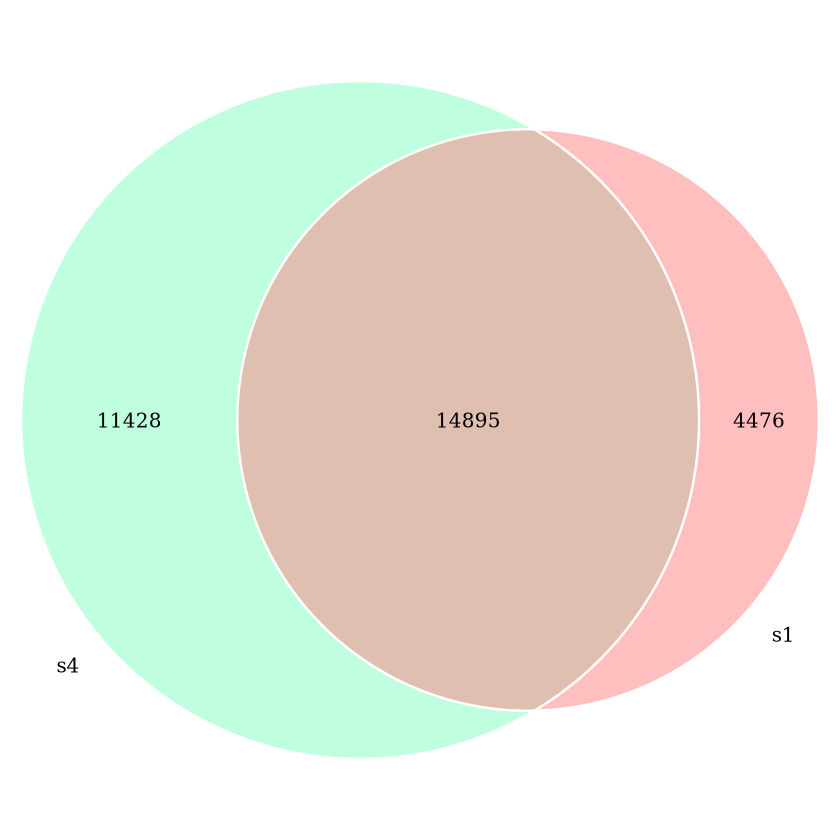

In [15]:
# gr1とgr2についてオーバーラップの検出
ol <- findOverlapsOfPeaks(gr1, gr2)

# ベン図を作成する
plot1 <- makeVennDiagram(ol, NameOfPeaks=c("s1", "s4"), 
                fill=c("#ff7f7f", "#7fffbf"),
                col=c("#ffffff", "#ffffff"),
                cat.col=c("#000000", "#000000"))

### ベン図について超幾何分布を計算する

In [16]:
# 必要なパッケージをインストール
if (!requireNamespace("ChIPpeakAnno", quietly = TRUE)) {
  install.packages("ChIPpeakAnno")
}
if (!requireNamespace("VennDiagram", quietly = TRUE)) {
  install.packages("VennDiagram")
}


Loading required package: grid

Loading required package: futile.logger



In [ ]:
# libraryの読み込み
library(ChIPpeakAnno)
library(VennDiagram)

In [17]:
# libraryの動作確認
library(ChIPpeakAnno)
library(VennDiagram)

In [18]:
# ファイルパスを変数に格納
file_path1 <- "/home/inou_doi/demo/3_peak_call/MACS2_def/SRR7475870_peaks.narrowPeak"
file_path2 <- "/home/inou_doi/demo/3_peak_call/MACS2_def/SRR7475873_peaks.narrowPeak"

このWarningはunknownのクロモソームがデータに残っていた場合に考えられる。unknownの配列であるならば、まだ機能がわかっていないので解析にいれる必要はない。  \
→可能であれば、フィルタリングの段階などで除去しておく方が良いのかもしれない。

In [19]:
# ファイルからGRangesオブジェクトを作成
gr1 <- toGRanges(file_path1, format="narrowPeak", header=FALSE)
gr2 <- toGRanges(file_path2, format="narrowPeak", header=FALSE)

Warning message in formatStrand(strand):
“All the characters for strand, 
            other than '1', '-1', '+', '-' and '*', 
            will be converted into '*'.”
Warning message in formatStrand(strand):
“All the characters for strand, 
            other than '1', '-1', '+', '-' and '*', 
            will be converted into '*'.”


In [20]:
# ピークのオーバーラップを見つける
ol <- findOverlapsOfPeaks(gr1, gr2, connectedPeaks="keepAll")

Warning message in .merge_two_Seqinfo_objects(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr6_cox_hap2
  - in 'y': chr9_gl000198_random, chrUn_gl000234, chrUn_gl000237
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”


In [21]:
# ピーク幅の平均値を再計算
averagePeakWidth <- mean(width(unlist(GRangesList(ol$peaklist))))
print(paste("Average Peak Width:", averagePeakWidth))

[1] "Average Peak Width: 521.067253933169"


In [22]:
# 母集団サイズの計算
M <- length(gr1) + length(gr2) - length(ol$peaklist[[1]])

In [23]:
# 変数の値を確認
print(paste("M (total):", M))
print(paste("n (length of gr1):", length(gr1)))
print(paste("N (length of gr2):", length(gr2)))
print(paste("x (overlap):", length(ol$peaklist[[1]])))

[1] "M (total): 34848"
[1] "n (length of gr1): 19683"
[1] "N (length of gr2): 26593"
[1] "x (overlap): 11428"


In [26]:
expected_overlap <- (length(gr1) * length(ol$peaklist[[1]])) / M
print(expected_overlap)

[1] 6454.813


In [27]:
# 実際のオーバーラップ数
actual_overlap <- length(ol$peaklist[[1]])
print(paste("Actual overlap:", actual_overlap))

[1] "Actual overlap: 11428"


In [34]:
# ハイパージオメトリックテスト
p_value <- phyper(actual_overlap - 1, length(ol$peaklist[[1]]),  length(gr1) + length(gr2) - 2*length(ol$peaklist[[1]]) , length(gr1), lower.tail = FALSE)
print(paste("p-value:", p_value))

[1] "p-value: 0"


限りなく0に近い値のため、結果は0と表示される。  
以下により詳細に数値を知りたいのコードを記載する。

In [37]:
#　必要なパッケージをインストール
install.packages("gmp")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [38]:
# libraryを読み込む
library(gmp)


Attaching package: ‘gmp’


The following objects are masked from ‘package:base’:

    %*%, apply, crossprod, matrix, tcrossprod




In [39]:
# libraryの動作を確認する
library(gmp)

In [40]:
# ハイパージオメトリック分布を使用して p 値を計算
p_value <- phyper(actual_overlap - 1, length(ol$peaklist[[1]]),  length(gr1) + length(gr2) - 2*length(ol$peaklist[[1]]) , length(gr1), lower.tail = FALSE)

# p 値を高精度で表示するために as.bigz に変換
p_value_decimal <- as.bigz(p_value)

print(paste("p-value:", format(p_value_decimal, scientific = TRUE)))

[1] "p-value: 0"


### pie chartの作成

必要なパッケージをインストールする。

In [1]:
# BiocManagerパッケージがインストールされていない場合にのみ、BiocManagerをインストールする
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

In [2]:
# TxDb.Hsapiens.UCSC.hg19.knownGeneパッケージをインストールする
BiocManager::install("TxDb.Hsapiens.UCSC.hg19.knownGene")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.25), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'TxDb.Hsapiens.UCSC.hg19.knownGene'”
Old packages: 'abind', 'amap', 'ape', 'aplot', 'askpass', 'backports',
  'bdsmatrix', 'BiocFileCache', 'biomaRt', 'Biostrings', 'bit', 'bit64',
  'bitops', 'boot', 'broom', 'BSgenome', 'bslib', 'cachem', 'callr', 'caTools',
  'circlize', 'cli', 'clock', 'clusterProfiler', 'coda', 'codetools',
  'colorspace', 'commonmark', 'cpp11', 'crayon', 'crul', 'curl', 'data.table',
  'DBI', 'dbplyr', 'deldir', 'DESeq2', 'digest', 'DOSE', 'DT', 'e1071',
  'evaluate', 'farver', 'fastmap', 'fontawesome', 'foreign', 'fs', 'future',
  'future.apply', 'GenomeInfoDb', 'GenomicAlign

In [12]:
#　libraryを読み込む
library(TxDb.Hsapiens.UCSC.hg19.knownGene) 

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.




In [13]:
#　libraryの動作を確認する
library(TxDb.Hsapiens.UCSC.hg19.knownGene) 

In [14]:
# TxDb.Hsapiens.UCSC.hg19.knownGeneパッケージからデータを読み込み、GenomicRangesオブジェクトに変換する
annoData <- toGRanges(TxDb.Hsapiens.UCSC.hg19.knownGene)

  403 genes were dropped because they have exons located on both strands
  of the same reference sequence or on more than one reference sequence,
  so cannot be represented by a single genomic range.
  Use 'single.strand.genes.only=FALSE' to get all the genes in a
  GRangesList object, or use suppressMessages() to suppress this message.



assignChromosomeRegionは染色体領域を割り当て、ピークの分布を要約するのに使われる。 以下のオプションから必要なラベルを選択する。 

"Exons", "Introns", "fiveUTRs", "threeUTRs", "Promoter", "ImmediateDownstream", "Enhancer.Silencer"

In [21]:
# gr1オブジェクトの染色体名のスタイルをannoDataオブジェクトの染色体名のスタイルに合わせる
seqlevelsStyle(gr1) <- seqlevelsStyle(annoData)

In [22]:
# gr1オブジェクトのピークを染色体領域に割り当て、その分布を要約する
aCR <- assignChromosomeRegion(gr1, nucleotideLevel=FALSE,
                           precedence=c("Promoters", "immediateDownstream",
                                         "fiveUTRs", "threeUTRs",
                                         "Exons", "Introns"),
                           TxDb=TxDb.Hsapiens.UCSC.hg19.knownGene)

In [23]:
# aCRオブジェクトの各染色体領域の名前と、その領域に割り当てられたピークの割合をラベルとして作成する
labels <- paste(names(aCR$percentage), round(aCR$percentage, 2), "%")

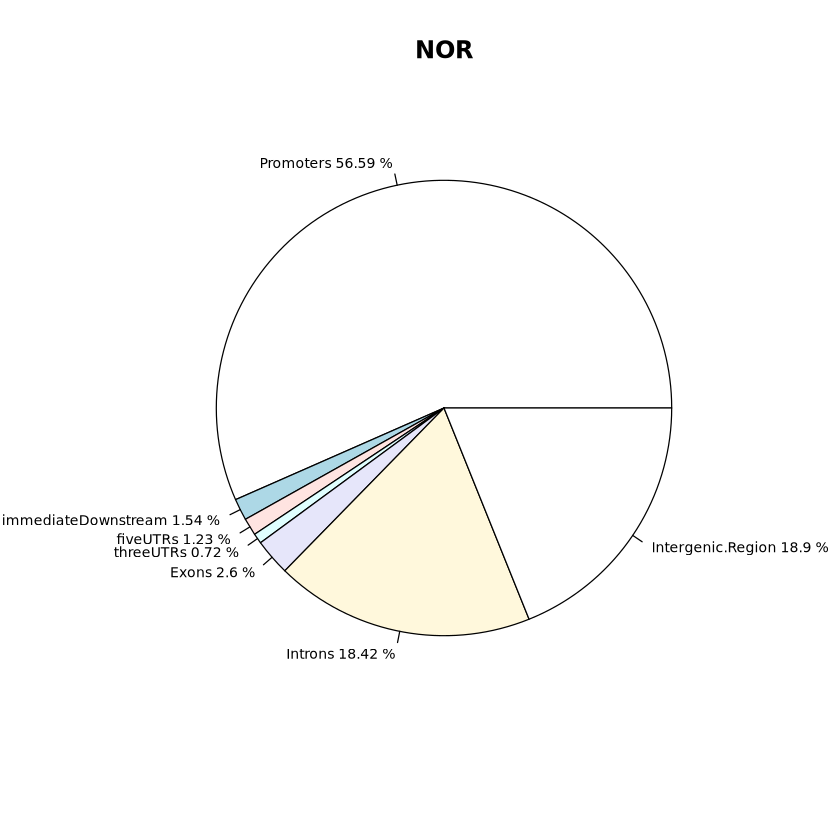

In [24]:
# pie chartをプロットする
plot11 <- pie(aCR$percentage, 
              labels = labels, 
              main = "NOR", 
              cex = 0.7)

In [25]:
# gr2オブジェクトの染色体名のスタイルをannoDataオブジェクトの染色体名のスタイルに合わせる
seqlevelsStyle(gr2) <- seqlevelsStyle(annoData)

In [26]:
# gr2オブジェクトのピークを染色体領域に割り当て、その分布を要約する
aCR <- assignChromosomeRegion(gr2, nucleotideLevel=FALSE,
                           precedence=c("Promoters", "immediateDownstream",
                                         "fiveUTRs", "threeUTRs",
                                         "Exons", "Introns"),
                           TxDb=TxDb.Hsapiens.UCSC.hg19.knownGene)

In [27]:
# ラベルを作成する
labels <- paste(names(aCR$percentage), round(aCR$percentage, 2), "%")

In [28]:
# pdfで保存する
pdf("NOR_pie_chart.pdf")

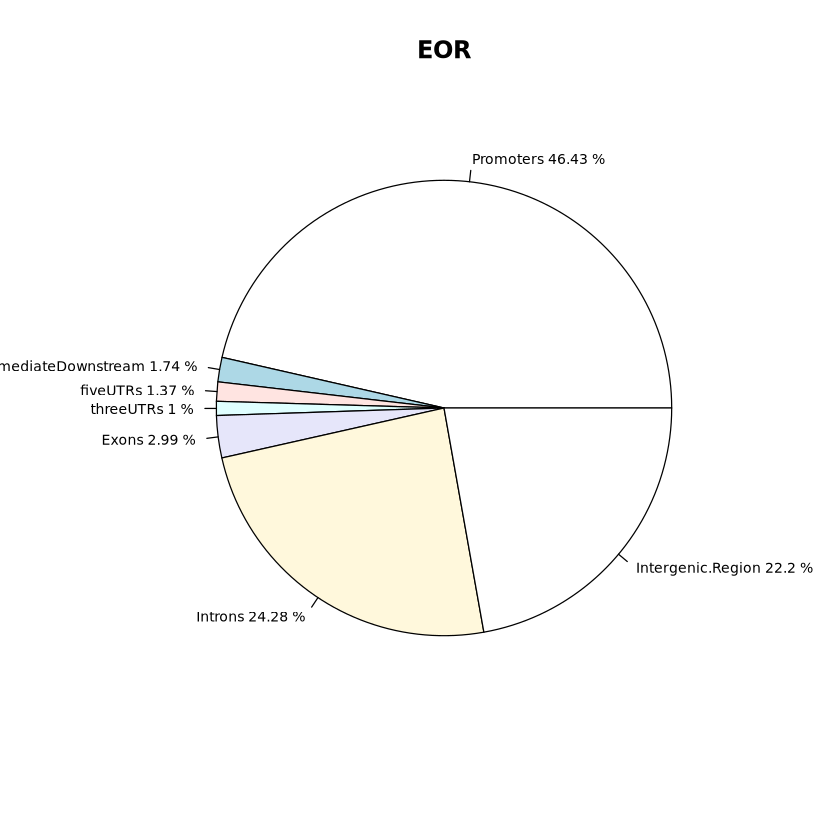

In [29]:
# pie chartをプロットする
plot11 <- pie(aCR$percentage, 
              labels = labels, 
              main = "EOR", 
              cex = 0.7)

In [30]:
#　グラフィックデバイスを終了する
dev.off()

pdf 
  3

In [34]:
# オーバーラップのピークを抽出する
overlaps <- ol$peaklist[["gr1///gr2"]]

In [35]:
# overlapsのオブジェクトのピークを染色体領域に割り当て、その分布を要約する
aCR <- assignChromosomeRegion(overlaps, nucleotideLevel=FALSE,
                           precedence=c("Promoters", "immediateDownstream",
                                         "fiveUTRs", "threeUTRs",
                                         "Exons", "Introns"),
                           TxDb=TxDb.Hsapiens.UCSC.hg19.knownGene)

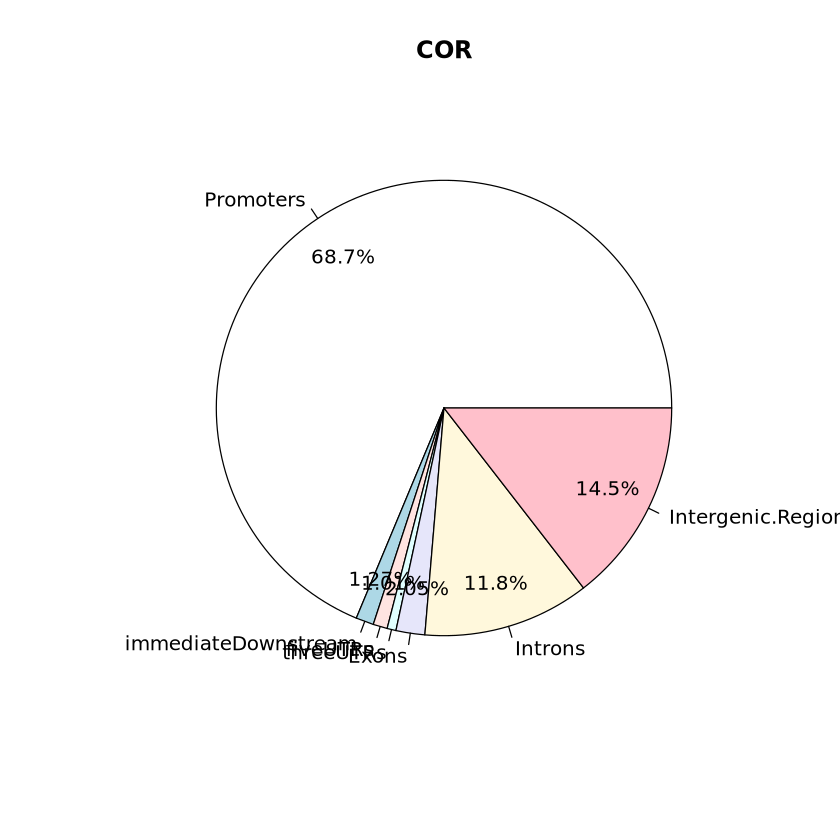

In [36]:
# pie chartを作成する
pie1(aCR$percentage, main="COR")